<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied DS & ML with Python Program)

# Clustering

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Generation

In [2]:
from sklearn.datasets import make_blobs # this is a method to generate sample datasets

In [3]:
blob_data = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=2.5, random_state=10)

In [4]:
X = pd.DataFrame(blob_data[0])
y = pd.Series(blob_data[1]) #y is tyically not available in unsupervised learning like in clustering
# here we have only for teaching purposes

**Lets look at the shape and head of the data**

In [5]:
X.shape  # Its a simple 2-dimensional data

(300, 2)

In [6]:
X.head(3)

,0,1
0,6.109036,-13.631388
1,1.494464,5.849769
2,5.718337,4.834776


**Lets name the columns**

In [7]:
X.columns = ['X0', 'X1']
X.head(3)

,X0,X1
0,6.109036,-13.631388
1,1.494464,5.849769
2,5.718337,4.834776


In [8]:
y.shape # In typical unsupervised learning or clustering, target variable (y) will not be available

(300,)

In [9]:
y.unique() # number of unique values
# In typical unsupervised learning or clustering, target variable (y) will not be available
# we can see that we have 4 clusters as defined by the y values or (labels)

array([0, 1, 3, 2], dtype=int64)

## 2. Data Visualization

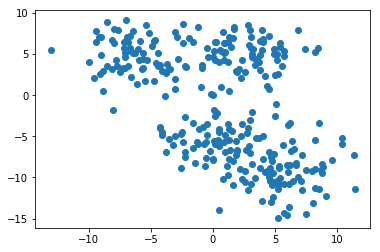

In [14]:
plt.scatter(X['X0'], X['X1']) # we are using matplotlib.pyplot as plt here
plt.show()

## 3. K-Means Clustering 

### 3.1 Fit the Kmeans algorithm to the data

In [15]:
#Kmeans algorithm is buit-in sklearn. we just import it and use it
from sklearn.cluster import KMeans

**How many clusters should we use??**

**Lets start with 2**

In [16]:
kmc2 = KMeans(n_clusters=2, random_state=0) # choose any arguments for the KMeans algorithm

**Fit the model to the training data with chosen number of clusters**

In [17]:
kmc2.fit(X) # fit the algorithm on the data set with independent variables

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

**Predict cluster labels assigned to each data point**

In [18]:
# One we fit the algoritum on X, with .labels_ method the algorithm assigns each data point (or row) to a particular cluster
kmc2.labels_  # the same result is obtained with .predict(X) method

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [19]:
#kmc2.predict(X)

In [20]:
ccenter2 = kmc2.cluster_centers_
ccenter2# to see the cluster centers. We get two points (x1,y1), (x2,y2) since we have chosen two centers

array([[ 3.15478486, -7.58524313],
       [-1.74716833,  4.83819601]])

**Even better to visualize the clusters**

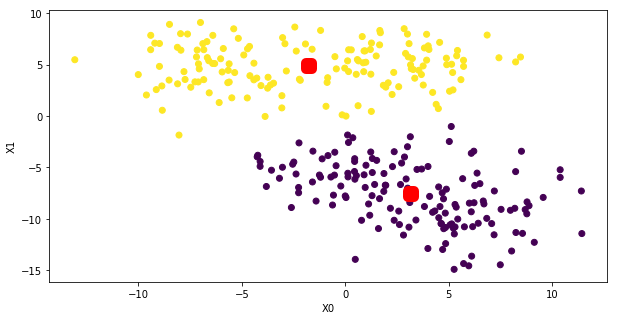

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(X['X0'], X['X1'], c= kmc2.labels_) 
plt.xlabel('X0')
plt.ylabel('X1')
# this plot is for the actual data points. We are coloring them with the cluster labels predicted by kmeans algorithm

plt.scatter(ccenter2[:,0], ccenter2[:,1], marker = 's', linewidth = 10, color = 'r')
# this plot is for the cluster centers.


plt.show()

**Lets choose 4 clusters**

In [24]:
kmc4 = KMeans(n_clusters=4, random_state=0)
kmc4.fit(X)
kmc4.labels_

array([0, 1, 1, 1, 2, 3, 3, 0, 1, 1, 0, 2, 3, 0, 1, 1, 0, 2, 3, 2, 3, 1,
       1, 1, 3, 2, 2, 2, 3, 2, 1, 0, 2, 0, 3, 1, 1, 3, 2, 1, 1, 0, 2, 1,
       2, 0, 2, 2, 1, 2, 1, 1, 3, 0, 3, 3, 1, 0, 3, 3, 1, 3, 3, 0, 3, 0,
       2, 2, 2, 2, 1, 2, 3, 0, 2, 2, 3, 2, 3, 1, 2, 1, 1, 0, 1, 3, 3, 1,
       0, 1, 2, 2, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0,
       1, 3, 2, 3, 1, 0, 1, 3, 3, 2, 1, 3, 1, 2, 1, 0, 3, 1, 2, 0, 0, 0,
       2, 1, 3, 0, 1, 0, 1, 3, 3, 0, 3, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       0, 2, 0, 3, 0, 2, 3, 2, 1, 1, 0, 3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 0,
       2, 2, 2, 0, 0, 1, 0, 1, 3, 2, 0, 1, 1, 0, 0, 2, 0, 3, 2, 3, 3, 2,
       0, 0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 3, 0, 3, 2, 3, 0, 3, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 3, 0, 3, 1, 0,
       2, 1, 0, 3, 0, 2, 3, 1, 1, 1, 3, 3, 3, 2, 2, 0, 1, 2, 2, 3, 3, 3,
       0, 2, 0, 3, 0, 0, 1, 1, 3, 3, 1, 3, 3, 2])

In [25]:
ccenter4 = kmc4.cluster_centers_
ccenter4 # 4 cluster centers

array([[ 5.93303618, -9.56128194],
       [ 2.72360565,  4.95586721],
       [-6.17134837,  4.7699137 ],
       [ 0.10928006, -5.38148614]])

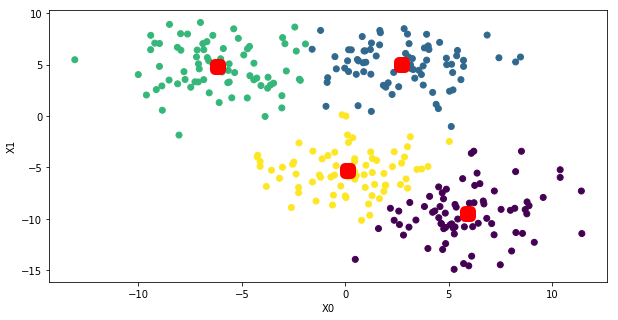

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(X['X0'], X['X1'], c=kmc4.labels_)
plt.xlabel('X0')
plt.ylabel('X1')

plt.scatter(ccenter4[:,0], ccenter4[:,1], marker = 's', linewidth = 10, c = 'r')

plt.show()

### 3.2 How to choose optimal number of clusters

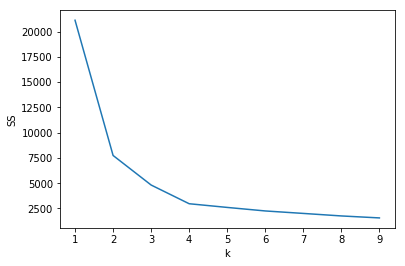

In [27]:
SS = []
NC = range(1,10)
for k in NC:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SS.append(km.inertia_)
plt.plot(NC,SS)
plt.xlabel('k')
plt.ylabel('SS')
plt.show()

**We can clearly see that for k=4, SS dramatically decreases**

**Compare plots of kmeans clustering with actual cluster labels**

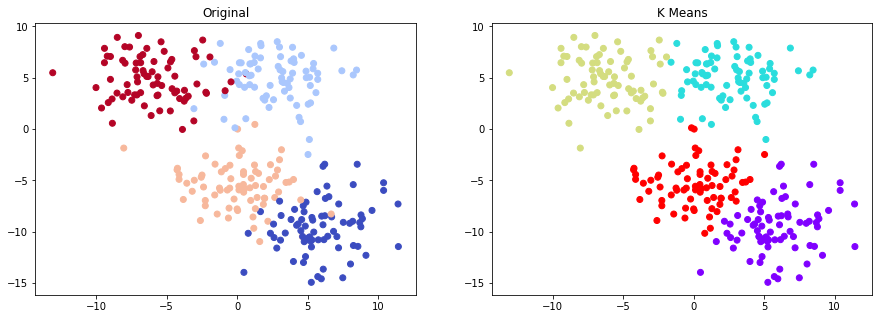

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].set_title("Original")
ax[0].scatter(X['X0'],X['X1'],c=y, cmap='coolwarm')

ax[1].set_title('K Means')
ax[1].scatter(X['X0'],X['X1'],c=kmc4.labels_,cmap='rainbow')
plt.show()

## 4. Breast Cancer Data set

**Lets load the breast cancer dataset from sklearn**

In [29]:
from sklearn import datasets

In [30]:
bcancer = datasets.load_breast_cancer()

In [31]:
bcancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [32]:
X_cancer = pd.DataFrame(bcancer['data'], columns = bcancer['feature_names'])
y_cancer= pd.Series(bcancer['target']) # y here doesnt mean anything for unspervised learning. but we include it for demonstration

In [33]:
X_cancer.shape # 569 rows and 30 columns or features

(569, 30)

In [34]:
X_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [35]:
y_cancer.head(3)

0    0
1    0
2    0
dtype: int32

In [36]:
y_cancer.value_counts() # check the benign (357) and malignant cases (212). 

1    357
0    212
dtype: int64

In [37]:
y_cancer = 1-y_cancer
y_cancer.value_counts()

0    357
1    212
dtype: int64

### 4.2 Kmeans

**Here we know that we have 2 classes**

In [38]:
kmc_cancer = KMeans(n_clusters=2, random_state=0)
kmc_cancer.fit(X_cancer)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [39]:
kmc_cancer.cluster_centers_ # these are the centroids of 2 clusters

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

**How well did the unsupervised Kmeans model do in clustering the data ?**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_cancer, kmc_cancer.labels_)

array([[356,   1],
       [ 82, 130]], dtype=int64)

In [41]:
accuracy_score(y_cancer, kmc_cancer.labels_) 
#in typical USL problem, we will not have actual target variables (y_cancer).So we cannot evaluate the model in this fashion

0.8541300527240774

In [42]:
#Not bad for an unspervised model. Can you remember what the accuracy for supevised ML with logistic regression()

### 4.3 Lets Visualize the data

In [43]:
X_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


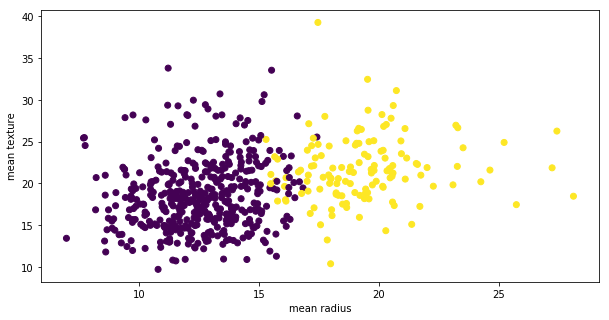

In [44]:
plt.figure(figsize = (10,5))
plt.scatter(X_cancer['mean radius'], X_cancer['mean texture'], c = kmc_cancer.labels_)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

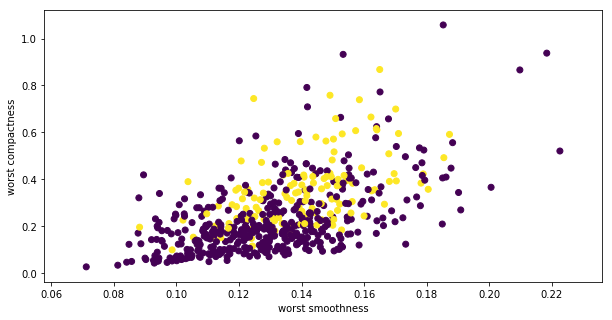

In [45]:
plt.figure(figsize = (10,5))
plt.scatter(X_cancer['worst smoothness'], X_cancer['worst compactness'], c = kmc_cancer.labels_)
plt.xlabel('worst smoothness')
plt.ylabel('worst compactness')
plt.show()

In [ ]:
#Plotting the above data with just 2 variables doesnt make complete sense
#what if we want to plot the data with respect to all dimensions??. Hard to imagine multi-dimensional plots. 
# PCA Can help here in visualization

### 5.4 PCA  (used to reduce the overall dimensionality of dataset)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_cancer = PCA(n_components = 2, random_state = 0) # we are choosing 2 principal components
X_pca = pca_cancer.fit_transform(X_cancer) # fit and transform

In [48]:
X_pca.shape

(569, 2)

In [49]:
X_pca = pd.DataFrame(X_pca) # PCA algorithm reduced the original dataset with 30 columns to a 2D dataset (wtih 2 components)
X_pca.head(3)

,0,1
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743


**Lets visualize the data now with the new low-dimensional space (2D) Dataset**

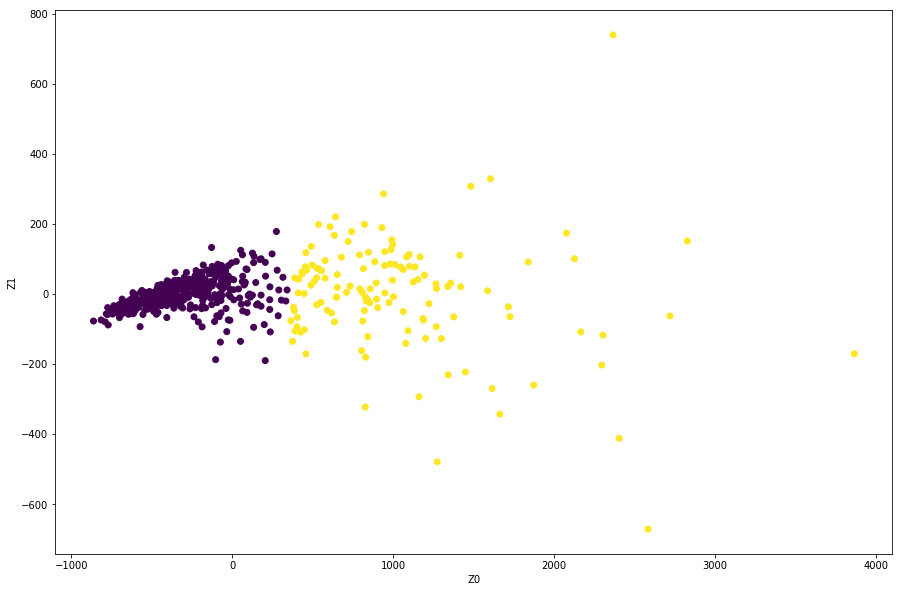

In [50]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca[0], X_pca[1], c = kmc_cancer.labels_)
plt.xlabel('Z0')
plt.ylabel('Z1')
plt.show()

In [51]:
(pca_cancer.explained_variance_ratio_).round(3)

array([0.982, 0.016])